Import des librairies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Chargement du dataset

In [5]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.head()

,year,slug_game,country_3_letter_code_x,bronze_medals,gold_medals,silver_medals,total_medals,total_athletes,avg_age_athletes,medals_in_current_year,city,season,game_name,cumulative_medals,is_host,season_Winter
0,2008,beijing-2008,AFG,1,0,0,1,2,22.500000,1,China,Summer,Beijing 2008,0.0,0,0
1,2012,london-2012,AFG,1,0,0,1,4,25.000000,1,Great Britain,Summer,London 2012,1.0,0,0
2,1988,seoul-1988,AHO,0,0,1,1,3,25.250000,1,Republic of Korea,Summer,Seoul 1988,2.0,0,0
3,1984,los-angeles-1984,ALG,2,0,0,2,11,25.818182,2,United States,Summer,Los Angeles 1984,1.0,0,0
4,1992,barcelona-1992,ALG,1,1,0,2,22,24.136364,2,Spain,Summer,Barcelona 1992,2.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     2205 non-null   int64  
 1   slug_game                2205 non-null   object 
 2   country_3_letter_code_x  2205 non-null   object 
 3   bronze_medals            2205 non-null   int64  
 4   gold_medals              2205 non-null   int64  
 5   silver_medals            2205 non-null   int64  
 6   total_medals             2205 non-null   int64  
 7   total_athletes           2205 non-null   int64  
 8   avg_age_athletes         2177 non-null   float64
 9   medals_in_current_year   2205 non-null   int64  
 10  city                     2205 non-null   object 
 11  season                   2205 non-null   object 
 12  game_name                2205 non-null   object 
 13  cumulative_medals        2205 non-null   float64
 14  is_host                 

In [7]:
df['avg_age_athletes'] = df['avg_age_athletes'].fillna(
    df['avg_age_athletes'].mean()
)


In [8]:
df['season_Winter'] = (df['season'] == 'Winter').astype(int)



In [9]:
df.isnull().sum()

,0
year,0
slug_game,0
country_3_letter_code_x,0
bronze_medals,0
gold_medals,0
silver_medals,0
total_medals,0
total_athletes,0
avg_age_athletes,0
medals_in_current_year,0


In [10]:
y = df['total_medals']

X = df[
    [
        'total_athletes',
        'avg_age_athletes',
        'cumulative_medals',
        'is_host',
        'season_Winter'

    ]
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Linear Regression
MAE: 7.155424573244149
R2: 0.7283262375648363


In [11]:

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("R²  :", r2_score(y_test, y_pred_rf))


Random Forest
MAE : 4.366071232269326
R²  : 0.8922900541092079


COMPARAISON DIRECTE PRÉDIT VS RÉEL


In [12]:
X_test_full = df.loc[X_test.index]

In [13]:
comparison_df = pd.DataFrame({
      'Country': X_test_full['country_3_letter_code_x'],
    'Real_Medals': y_test.values,
    'Predicted_Medals': y_pred_rf
})

comparison_df['Error'] = comparison_df['Predicted_Medals'] - comparison_df['Real_Medals']

comparison_df.head(10)


,Country,Real_Medals,Predicted_Medals,Error
1966,TPE,1,3.139955,2.139955
1091,ITA,13,15.141996,2.141996
1468,NOR,7,6.711466,-0.288534
438,CYP,1,3.393185,2.393185
1790,SUI,8,6.708171,-1.291829
1953,THA,3,3.254060,0.254060
752,GBR,35,7.134564,-27.865436
408,CRC,1,1.641751,0.641751
1477,NOR,5,7.743024,2.743024
2037,URS,103,69.811441,-33.188559


GRAPHIQUE RÉEL VS PRÉDIT

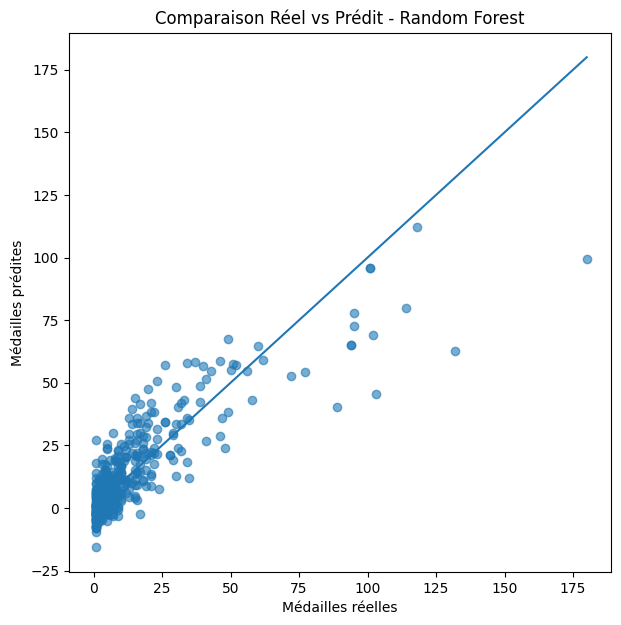

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, y_test.max()], [0, y_test.max()])
plt.xlabel("Médailles réelles")
plt.ylabel("Médailles prédites")
plt.title("Comparaison Réel vs Prédit - Random Forest")
plt.show()


ANALYSE DES ERREURS

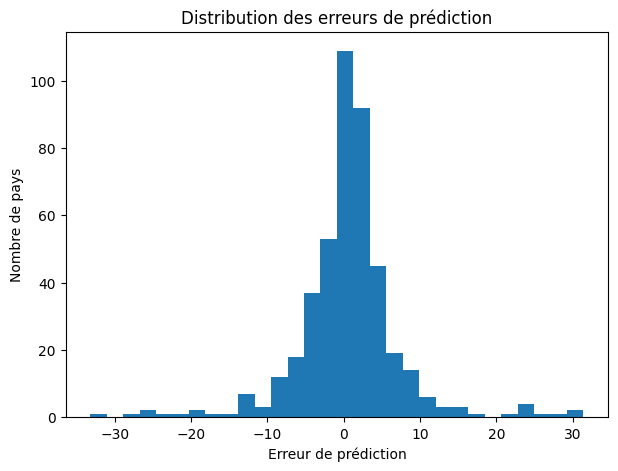

In [15]:
plt.figure(figsize=(7,5))
plt.hist(comparison_df['Error'], bins=30)
plt.xlabel("Erreur de prédiction")
plt.ylabel("Nombre de pays")
plt.title("Distribution des erreurs de prédiction")
plt.show()


COMPARAISON PAYS PERFORMANTS

In [16]:
comparison_df.sort_values(by='Real_Medals', ascending=False).head(10)


,Country,Real_Medals,Predicted_Medals,Error
2130,USA,180,157.360833,-22.639167
2056,URS,132,105.275926,-26.724074
2155,USA,118,119.546667,1.546667
561,EUN,114,120.646114,6.646114
2037,URS,103,69.811441,-33.188559
382,CHN,102,82.610847,-19.389153
2136,USA,101,110.171683,9.171683
2137,USA,101,110.171683,9.171683
2122,USA,95,98.540630,3.540630
1683,RUS,95,84.980192,-10.019808


In [17]:

comparison_df = pd.DataFrame({
    'Country': X_test_full['country_3_letter_code_x'].values,
    'Real_Medals': y_test.values,
    'Predicted_Medals': y_pred_rf
})


comparison_df['Error'] = comparison_df['Predicted_Medals'] - comparison_df['Real_Medals']

# Grouper par pays pour avoir une seule ligne par pays
country_summary = comparison_df.groupby('Country').agg({
    'Real_Medals': 'sum',
    'Predicted_Medals': 'sum',
    'Error': 'mean'
}).reset_index()


country_summary = country_summary.sort_values('Real_Medals', ascending=False)

country_summary


,Country,Real_Medals,Predicted_Medals,Error
90,USA,1130,1145.780342,0.830544
1,AUS,385,504.816715,9.984726
88,URS,335,241.558627,-15.573562
77,SWE,292,258.141795,-1.692910
34,GER,264,257.113851,-0.860769
...,...,...,...,...
78,SYR,1,1.880678,0.880678
87,UKR,1,4.326979,3.326979
85,UAE,1,2.266026,1.266026
89,URU,1,1.889510,0.889510


In [18]:
import joblib

joblib.dump(rf, "medals_prediction_model.pkl")


['medals_prediction_model.pkl']

In [19]:
from google.colab import files

files.download("medals_prediction_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>